# Capstone Project - Vegan Restaurants Analysis

# Importing required libraries

In [1]:

#!conda install -c conda-forge geopy --yes        # if needed
#!conda install -c conda-forge folium=0.5.0 --yes # if needed

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim 
GeoLocator = Nominatim(user_agent='My-IBMNotebook')# convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


!pip install folium
print('Libraries imported.')

    100% |████████████████████████████████| 92kB 6.8MB/s eta 0:00:01
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/

# Reading the dataset

In [2]:


import pandas as pd
nRowsRead = 1000
df = pd.read_csv('https://query.data.world/s/wncs7otcxitmpmzw6wpsyhzf6vmkdo',delimiter=',', nrows = nRowsRead)
df.dataframeName = 'https://query.data.world/s/wncs7otcxitmpmzw6wpsyhzf6vmkdo'
nRow, nCol = df.shape
print('There are {nRow} rows and {nCol} columns')
df.shape

There are {nRow} rows and {nCol} columns


(1000, 47)

In [3]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,claimed,country,cuisines,descriptions.dateSeen,descriptions.sourceURLs,descriptions.value,facebookPageURL,features.key,features.value,hours.day,hours.dept,hours.hour,imageURLs,isClosed,keys,languagesSpoken,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.dateSeen,menus.description,menus.name,menus.sourceURLs,name,paymentTypes,phones,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,sic,sourceURLs,twitter,websites,yearOpened
0,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,"Squash, carrots, butternut squash and potato",Baked Kabocha,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
1,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With wild blend brown rice,Short Grain Brown Rice,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
2,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,NaN,Green Bean Veggie Soup,https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
3,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,8.95,8.95,NaN,USD,2016-04-22T02:48:00.000Z,NaN,"Steamed Broccoli, Carrots and Turnips",https://foursquare.com/v/potala-organic-cafe/4...,Potala Organic Cafe,NaN,(510) 528-2375,94706,NaN,NaN,NaN,CA,NaN,https://foursquare.com/v/potala-organic-cafe/4...,NaN,"http://www.potala.us/,http://potala.us",NaN
4,AVwd3yXEkufWRAb59-sH,2016-04-22T02:47:48Z,2018-09-10T21:00:49Z,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Accommodation & Food Services,Albany,NaN,US,"Thai,Asian/Pacific,Vegetarian",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://igx.4sqi.net/img/general/600x600/o_h1i...,NaN,us/ca/albany/1045sanpabloave/-1106202297,NaN,37.885131,-122.297013,http://www.singlepage.com/ruen-pair-authentic-...,13.95,3.75,NaN,USD,2016-04-22T02:48:00.000Z,With vinegar tahini beet dressing,Mixed Green Salad,https://foursquare.com/v/potala-organ

# Cleaning the data by dropping irrelevant columns

In [4]:
df.drop(['dateAdded','dateUpdated','primaryCategories','claimed','descriptions.dateSeen','descriptions.sourceURLs','descriptions.value','facebookPageURL','features.key','features.value','hours.day','hours.dept','hours.hour','imageURLs','isClosed','languagesSpoken','menuPageURL','menus.dateSeen','menus.sourceURLs','phones','sic','sourceURLs','twitter','websites'], axis=1, inplace=True)
df.head()

,id,address,categories,city,country,cuisines,keys,latitude,longitude,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.description,menus.name,name,paymentTypes,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,yearOpened
0,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Albany,US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,"Squash, carrots, butternut squash and potato",Baked Kabocha,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
1,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Albany,US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,With wild blend brown rice,Short Grain Brown Rice,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
2,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Albany,US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,NaN,Green Bean Veggie Soup,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
3,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Albany,US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,8.95,8.95,NaN,USD,NaN,"Steamed Broccoli, Carrots and Turnips",Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
4,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",Albany,US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,With vinegar tahini beet dressing,Mixed Green Salad,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN


In [5]:
df.set_index('city', inplace=True)
df.head()

,id,address,categories,country,cuisines,keys,latitude,longitude,menus.amountMax,menus.amountMin,menus.category,menus.currency,menus.description,menus.name,name,paymentTypes,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,yearOpened
city,,,,,,,,,,,,,,,,,,,,,,
Albany,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,"Squash, carrots, butternut squash and potato",Baked Kabocha,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
Albany,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,With wild blend brown rice,Short Grain Brown Rice,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
Albany,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,NaN,Green Bean Veggie Soup,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
Albany,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,8.95,8.95,NaN,USD,NaN,"Steamed Broccoli, Carrots and Turnips",Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN
Albany,AVwd3yXEkufWRAb59-sH,1045 San Pablo Ave,"Restaurant,Asian/Pacific,Cafe,Vegetarian / Veg...",US,"Thai,Asian/Pacific,Vegetarian",us/ca/albany/1045sanpabloave/-1106202297,37.885131,-122.297013,13.95,3.75,NaN,USD,With vinegar tahini beet dressing,Mixed Green Salad,Potala Organic Cafe,NaN,94706,NaN,NaN,NaN,CA,NaN


# Data Analysis

In [6]:
df.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,postalCode,priceRangeMin,priceRangeMax,yearOpened
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,826.000000,826.000000,91.0
mean,39.460745,-77.563631,8.683640,8.642840,19390.321000,5.145278,28.444310,2015.0
std,3.365906,10.018002,11.336131,11.335459,23949.389207,10.113451,6.022779,0.0
min,29.744809,-122.297013,0.250000,0.250000,10003.000000,0.000000,25.000000,2015.0
25%,40.689791,-74.001710,4.000000,4.000000,10011.000000,0.000000,25.000000,2015.0
50%,40.729012,-73.998173,7.000000,6.995000,10011.000000,0.000000,25.000000,2015.0
75%,40.740560,-73.986771,9.562500,9.500000,11205.000000,0.000000,30.000000,2015.0
max,40.785469,-73.957970,195.000000,195.000000,94706.000000,25.000000,40.000000,2015.0


In [7]:
df_province=df['province'].value_counts()
df_province

NY    872
TX     91
CA     37
Name: province, dtype: int64

In [8]:
df2=df.groupby('city')['menus.amountMax'].mean()
df2

city
Albany       12.950000
Brooklyn      7.599841
Houston      22.324176
New York      7.225974
San Diego     6.740000
Name: menus.amountMax, dtype: float64

In [9]:
df3=df.groupby('city')['menus.amountMin'].mean()
df3

city
Albany        4.790000
Brooklyn      7.599841
Houston      22.324176
New York      7.225974
San Diego     6.740000
Name: menus.amountMin, dtype: float64

In [10]:

grouped=df.groupby('city').agg({"priceRangeMin":[sum,min,max]})
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

grouped.head()

,priceRangeMin_sum,priceRangeMin_min,priceRangeMin_max
city,,,
Albany,NaN,NaN,NaN
Brooklyn,0.0,0.0,0.0
Houston,2275.0,25.0,25.0
New York,1175.0,0.0,25.0
San Diego,800.0,25.0,25.0


# Visualizing the Data

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

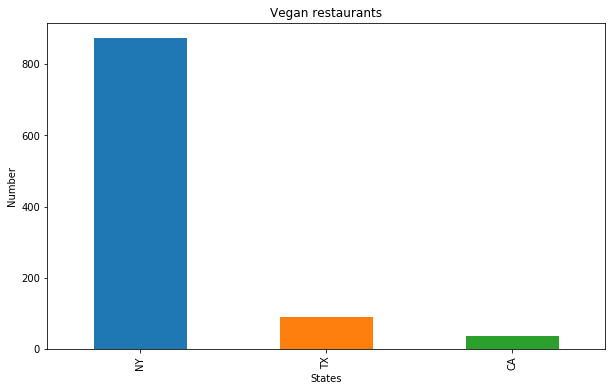

In [12]:
df_province.plot(kind='bar', figsize=(10, 6))

plt.xlabel('States') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Vegan restaurants') # add title to the plot

plt.show()

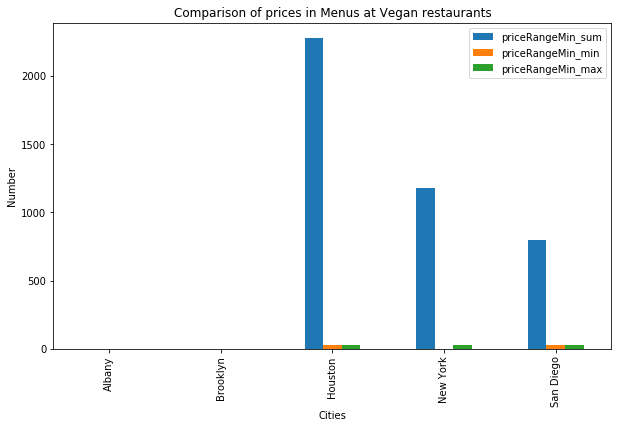

In [13]:
grouped.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cities') # add to x-label to the plot
plt.ylabel('Number') # add y-label to the plot
plt.title('Comparison of prices in Menus at Vegan restaurants') # add title to the plot

plt.show()

In [14]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print('No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for {Vegan Restaurants}', fontsize=15)
    plt.show()

In [15]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.title('Histogram)')
    plt.show()

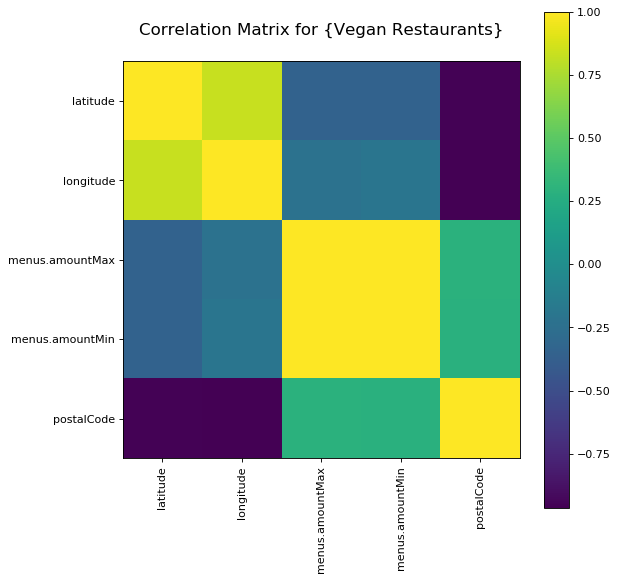

In [16]:
df.dataframeName = 'https://query.data.world/s/wncs7otcxitmpmzw6wpsyhzf6vmkdo'
plotCorrelationMatrix(df, 8)

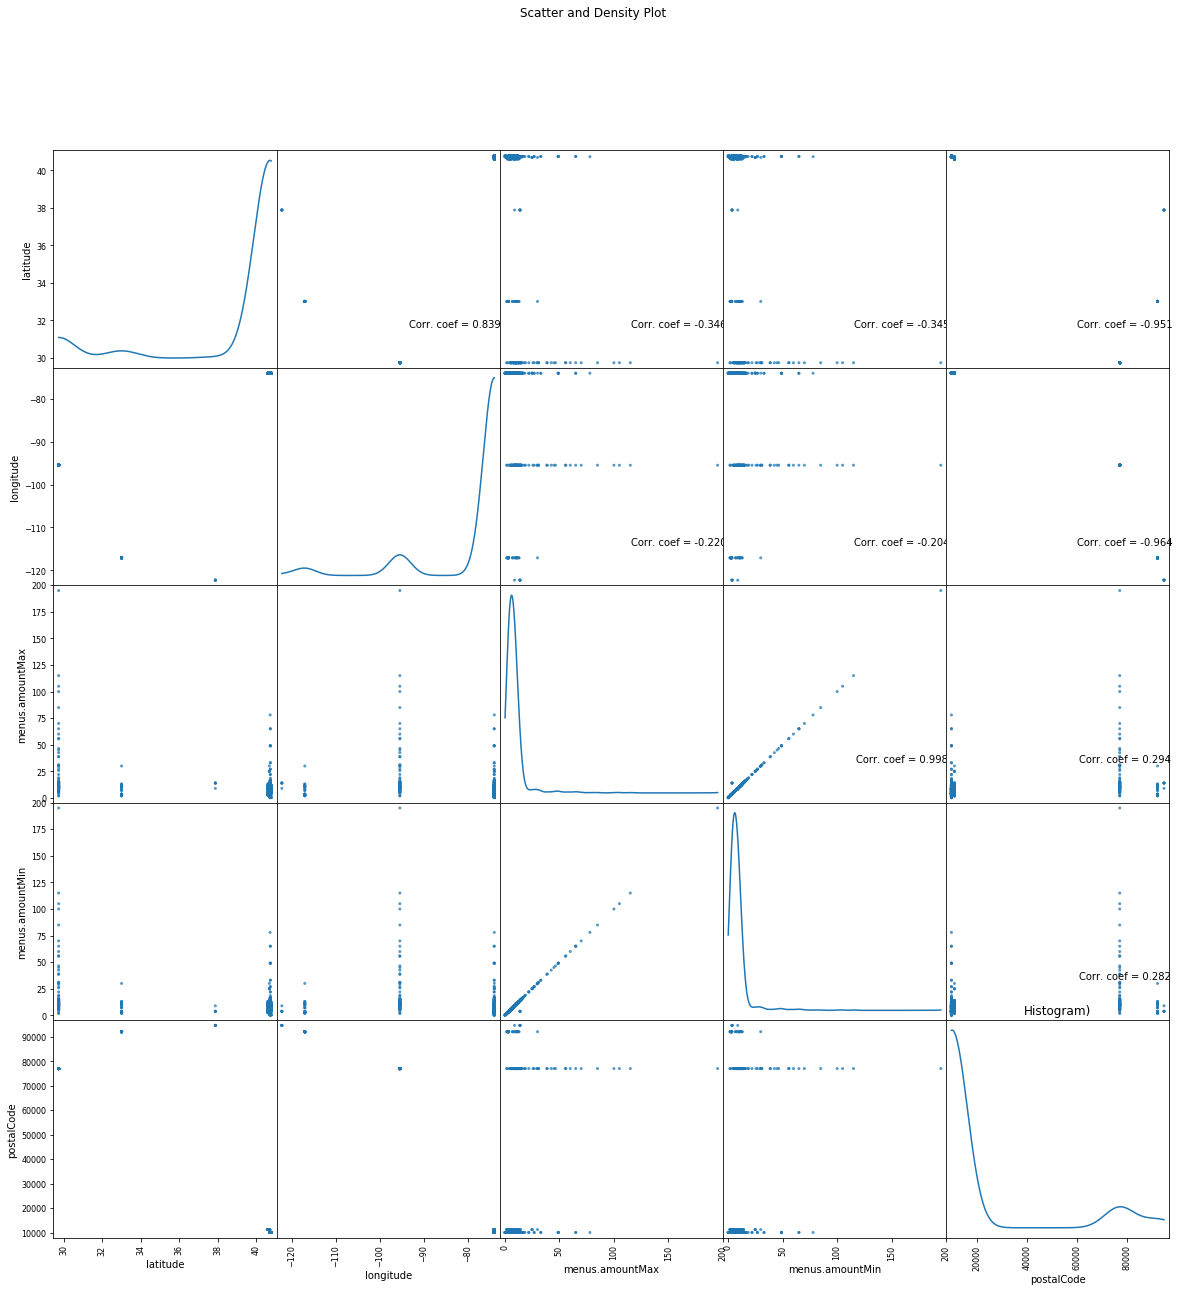

In [17]:
plotScatterMatrix(df, 20, 10)

# Foursquare API for Vegan Restaurants in New York

In [18]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.19.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.69 MB/s
geopy-1.19.0-p 100% |################################| Time: 0:00:00  36.83 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  43.09 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  34.33 MB/s
vincent-0.4.4- 100% |###################

In [19]:
CLIENT_ID = '3XT1QWQ523NH3SCVSK3VX3GA2I1L00WCOZ55VWUZT3EKXSA5' # your Foursquare ID
CLIENT_SECRET = 'Z5QDHSQ30W2ANR1FKSYSYMZXRREELDRWB1VUQBSULJNFZRDS' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3XT1QWQ523NH3SCVSK3VX3GA2I1L00WCOZ55VWUZT3EKXSA5
CLIENT_SECRET:Z5QDHSQ30W2ANR1FKSYSYMZXRREELDRWB1VUQBSULJNFZRDS


In [20]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [21]:
search_query = 'Indian'
radius = 500
print(search_query + ' .... OK!')

Indian .... OK!


In [22]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3XT1QWQ523NH3SCVSK3VX3GA2I1L00WCOZ55VWUZT3EKXSA5&client_secret=Z5QDHSQ30W2ANR1FKSYSYMZXRREELDRWB1VUQBSULJNFZRDS&ll=40.7149555,-74.0153365&v=20180604&query=Indian&radius=500&limit=30'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cc107c0d69ed0002c5713ae'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'primary': True,
      'shortName': 'Food Truck'}],
    'hasPerk': False,
    'id': '5072fe2eb0ed0fcce2497f30',
    'location': {'address': 'Water St',
     'cc': 'US',
     'city': 'New York',
     'country': 'United States',
     'crossStreet': 'btwn Maiden Lane & Pine St',
     'distance': 332,
     'formattedAddress': ['Water St (btwn Maiden Lane & Pine St)',
      'New York, NY 10005',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71438459229154,
       'lng': -74.0114698552355}],
     'lat': 40.71438459229154,
     'lng': -74.0114698552355,
     'postalCode': '10005',
     'state': 'NY'},
    'name': 'Indian Biryani Delights (

In [24]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'shortName': 'Food Truck', 'pluralName': 'Fo...",NaN,NaN,NaN,NaN,NaN,NaN,False,5072fe2eb0ed0fcce2497f30,Water St,US,New York,United States,btwn Maiden Lane & Pine St,332,"[Water St (btwn Maiden Lane & Pine St), New Yo...","[{'label': 'display', 'lng': -74.0114698552355...",40.714385,-74.011470,10005,NY,Indian Biryani Delights (Cart),v-1556154304,NaN
1,"[{'shortName': 'Indian', 'pluralName': 'Indian...",79935,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/ruchi-120-cedar-...,False,4b12cb6ff964a5204a8e23e3,120 Cedar St,US,New York,United States,btwn Greenwich St. & Trinity Pl.,590,[120 Cedar St (btwn Greenwich St. & Trinity Pl...,"[{'label': 'display', 'lng': -74.0129693504223...",40.709962,-74.012969,10006,NY,Ruchi Indian Cuisine,v-1556154304,337710444
2,"[{'shortName': 'Apparel', 'pluralName': 'Cloth...",NaN,NaN,NaN,NaN,NaN,NaN,False,574eab2a498e3f5530cfdbca,100 Church St,US,New York,United States,NaN,530,"[100 Church St, New York, NY 10007, United Sta...","[{'label': 'display', 'lng': -74.0101289749145...",40.712281,-74.010129,10007,NY,Indian Beautiful Art (IBA) Crafts PVT Ltd,v-1556154304,NaN
3,"[{'shortName': 'Indian', 'pluralName': 'Indian...",26275,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/salaam-bombay-31...,False,4aef32f7f964a52081d621e3,317 Greenwich St,US,New York,United States,Reade St,435,"[317 Greenwich St (Reade St), New York, NY 100...","[{'label': 'display', 'lng': -74.0109050966143...",40.716954,-74.010905,10013,NY,Salaam Bombay,v-1556154304,71423083


In [25]:
#keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Indian Biryani Delights (Cart),Food Truck,Water St,US,New York,United States,btwn Maiden Lane & Pine St,332,"[Water St (btwn Maiden Lane & Pine St), New Yo...","[{'label': 'display', 'lng': -74.0114698552355...",40.714385,-74.011470,10005,NY,5072fe2eb0ed0fcce2497f30
1,Ruchi Indian Cuisine,Indian Restaurant,120 Cedar St,US,New York,United States,btwn Greenwich St. & Trinity Pl.,590,[120 Cedar St (btwn Greenwich St. & Trinity Pl...,"[{'label': 'display', 'lng': -74.0129693504223...",40.709962,-74.012969,10006,NY,4b12cb6ff964a5204a8e23e3
2,Indian Beautiful Art (IBA) Crafts PVT Ltd,Clothing Store,100 Church St,US,New York,United States,NaN,530,"[100 Church St, New York, NY 10007, United Sta...","[{'label': 'display', 'lng': -74.0101289749145...",40.712281,-74.010129,10007,NY,574eab2a498e3f5530cfdbca
3,Salaam Bombay,Indian Restaurant,317 Greenwich St,US,New York,United States,Reade St,435,"[317 Greenwich St (Reade St), New York, NY 100...","[{'label': 'display', 'lng': -74.0109050966143...",40.716954,-74.010905,10013,NY,4aef32f7f964a52081d621e3


In [26]:
dataframe_filtered.name

0               Indian Biryani Delights (Cart)
1                         Ruchi Indian Cuisine
2    Indian Beautiful Art (IBA) Crafts PVT Ltd
3                                Salaam Bombay
Name: name, dtype: object

In [33]:

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [32]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed and imported!


In [34]:
# New York City latitude and longitude values
latitude = 40.71455
longitude = -74.00712

In [44]:
df_map=df[['latitude','longitude', 'province']]
df_map.head()

,latitude,longitude,province
city,,,
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA


In [48]:
ny=df_map.groupby('province')
ny.head()

,latitude,longitude,province
city,,,
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
Albany,37.885131,-122.297013,CA
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY


In [51]:
df_NY=ny.get_group('NY')
df_NY

,latitude,longitude,province
city,,,
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
New York,40.785469,-73.979105,NY
